# CW 02 Part 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
import scipy

In [3]:
array_size = 300e-6  
num_pixels = 512  # Resolution

dx = array_size / num_pixels  # Pixel size

wvl = 633e-9
dz = 30e-6


# Create spatial coordinate grid
x = np.linspace(-array_size / 2, array_size / 2, num_pixels)
y = np.linspace(-array_size / 2, array_size / 2, num_pixels)
X, Y = np.meshgrid(x, y)

In [4]:
def angular_spectrum_propagation_range(U0, wvl, dx, dz, num_steps, absorptive_boundary= False):
    """
    Propagates an optical field using the Angular Spectrum Method over a range of distances.

    Parameters:
        U0      : 2D numpy array (input wavefield)
        wvl     : float (wavelength of light in meters)
        d_range : list or numpy array (range of propagation distances in meters)
        dx      : float (sampling interval in meters)

    Returns:
        U_list  : list of 2D numpy arrays (propagated wavefields for each distance in d_range)
    """
    
    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)
    
    # Initialize list to store results
    U_list = []
    
    # Apply super Gaussian absorptive boundary

    if absorptive_boundary:
        sigma = nx/3.5  # Standard deviation for Gaussian
        X, Y = np.meshgrid(np.linspace(-nx/2, nx/2, nx), np.linspace(-ny/2, ny/2, ny))
        window = np.exp(-((X**2 + Y**2) / (2 * sigma**2))**4)
    else:
        window = np.ones_like(U0)
        
    H = np.exp(1j * k * dz * np.sqrt(0j+ 1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))

    for _ in range(num_steps):
        
        # Apply transfer function
        U_spectrum = np.fft.fft2(U0) * H
        
        # Inverse FFT to obtain propagated field
        U0 = np.fft.ifft2(U_spectrum)
        U0 *= window
        U_list.append(U0)
        
    return U_list


# Q

-Define a linearly chirped binary grating (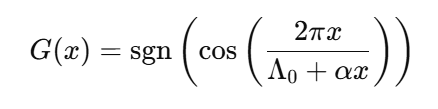) with given parameters

-Plot its x-z propagation plot

-Find the z distance where one order is focused


In [73]:
grating_period = 8e-6
grating_width = 100e-6
chirp_term = 0.05
prop_distance = 1e-3
prop_steps = np.round(prop_distance / dz).astype(int)


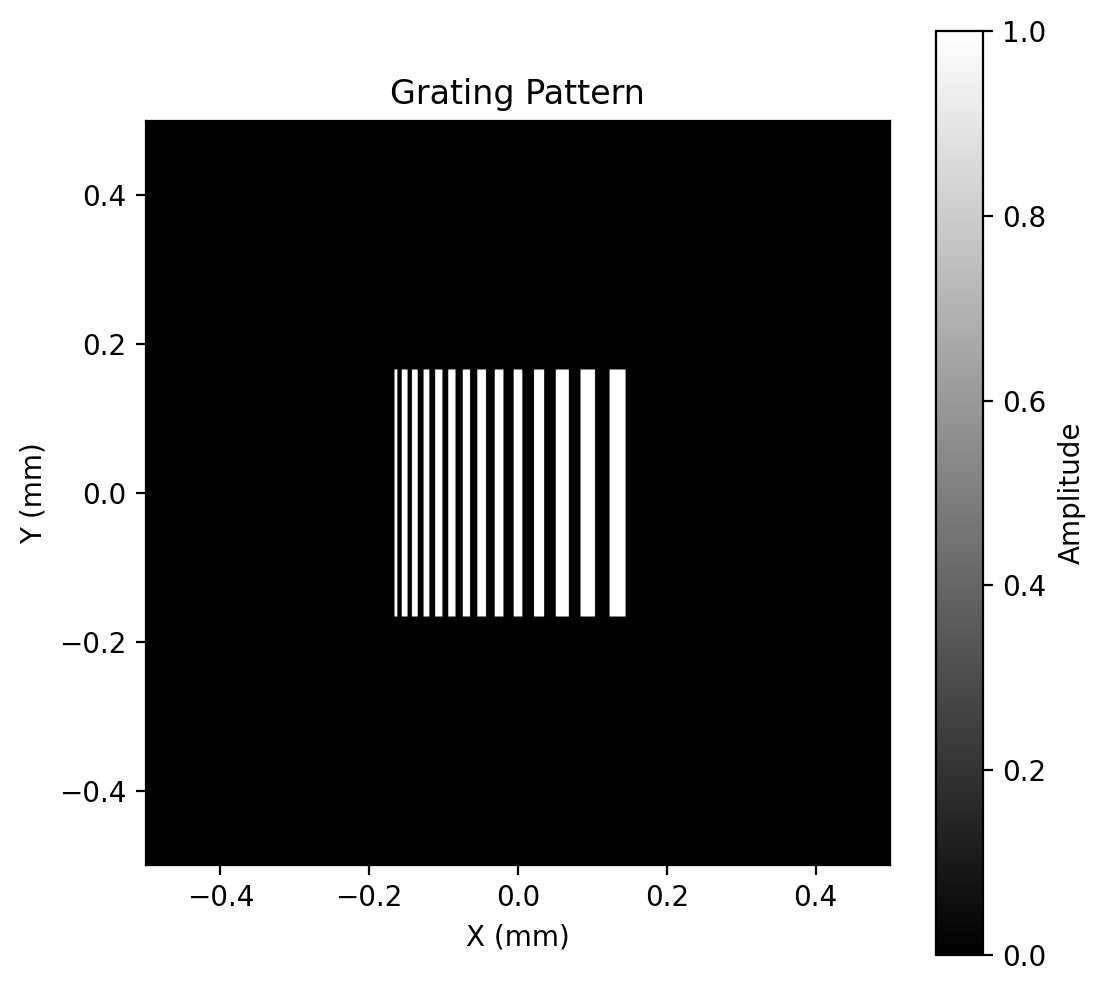

In [74]:
aperture = (np.abs(X) < (grating_width / 2)) * (np.abs(Y) < (grating_width / 2))

grating = (np.cos( 2 * np.pi * X/ (grating_period+ chirp_term*X)) > 0 ) * aperture

# Display the grating
plt.figure(figsize=(6, 6),dpi = 200)
plt.imshow(grating, cmap="gray", extent=[-0.5, 0.5, -0.5, 0.5])
plt.colorbar(label="Amplitude")
plt.title("Grating Pattern")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()


In [75]:
grating_zs = angular_spectrum_propagation_range(grating, wvl, dx, dz, prop_steps, True)

array_3d = np.stack(grating_zs, axis=0)

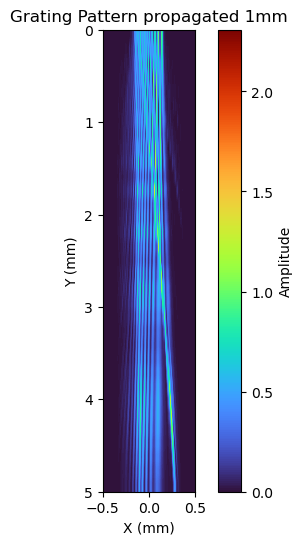

In [76]:
# Display the grating
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(array_3d[:, 256, :])**2, cmap="turbo", extent=[-0.5, 0.5, 5, 0])
plt.colorbar(label="Amplitude")
plt.title("Grating Pattern propagated 1mm")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()

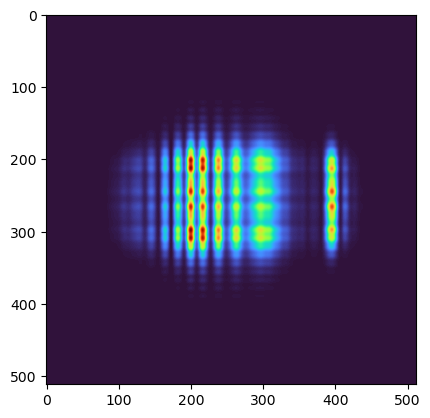

In [77]:
plt.imshow(np.abs(array_3d[-1, :, :])**2, cmap="turbo")
